In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ardi_data = pd.read_csv("Cleaned_1_data.csv")

ardi_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,ConditionType,Category,Cause_of_Death,Data_Value_Alt,Effect,ConsumptionPattern,Sex,AgeGroup
0,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),134.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
1,2015,2019,AL,Alabama,ARDI,Acute,Alcohol-Related Poisonings,Poisoning (not alcohol),82.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
2,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,247.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
3,2015,2019,AL,Alabama,ARDI,Acute,Motor Vehicle Traffic Crashes,Motor vehicle traffic crashes,72.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
4,2015,2019,AL,Alabama,ARDI,Acute,Other Acute Causes,Fire injuries,13.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,2015,2019,WI,Wisconsin,ARDI,Chronic,"Liver, Gallbladder, and Pancreas","Liver cirrhosis, unspecified",79.0,Harmful Effects,Any Alcohol Use,Male,Overall
2516,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,30.0,Harmful Effects,Excessive Alcohol Use,Female,Overall
2517,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,57.0,Harmful Effects,Excessive Alcohol Use,Male,Overall
2518,2015,2019,WY,Wyoming,ARDI,Chronic,100% Alcohol-Attributable,Alcoholic liver disease,30.0,Harmful Effects,Any Alcohol Use,Female,Overall


In [3]:
unique_cat = ardi_data['ConditionType'].unique()
print(unique_cat)

['Acute' 'Chronic']


In [4]:
# Age based 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'AgeGroup', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on condition using SVR
def predict_by_condition_svr(condition):
    df_filtered = ardi_data[ardi_data['ConditionType'] == condition]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'AgeGroup', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = SVR(kernel='linear')  # Using a linear kernel for SVR
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
#     model = SVR(kernel='rbf')  # Using RBF kernel for SVR
#     model.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)
    
    svr_mse = mean_squared_error(y_test, y_pred)
    svr_mae = mean_absolute_error(y_test, y_pred)
    svr_r2 = r2_score(y_test, y_pred)
    
    return y_pred, svr_mse, svr_mae, svr_r2

# Example prediction using SVR based on AgeGroup
condition  = 'Acute'

prediction, svr_mse, svr_mae, svr_r2 = predict_by_condition_svr(condition)
print(f"SVR Predicted values for '{condition}':", prediction)
print("Mean Squared Error (MSE):", svr_mse)
print("Mean Absolute Error (MAE):", svr_mae)
print("R-squared (R2):", svr_r2)


SVR Predicted values for 'Acute': [ 27.99428005  69.36134188  43.73328427 148.24771988  60.61988889
  92.34521388  69.23898794 148.15595442  16.19740546  27.41309882
 148.64537019 106.5441847   61.04812769  28.7589922   51.95698359
  84.97799215  19.43635798  24.44944267  12.68576523  91.88638659
 148.30889685  82.79462113  51.06991751  51.25344842  50.82520962
  42.93798364 147.5441847   85.1003461  148.82890111  12.96106161
  43.12151455  42.78504121 107.40066231  28.02486854  92.06991751
  60.28341555  51.37580236  84.54975335 107.82890111 147.48300773
  27.62721822  74.75445272  68.71898368  69.7589922   27.71898368
 147.85006956  51.89580662  92.46756782  43.21328001  84.91681518
  51.52874479  16.19740546  52.95164157 148.33948534 147.42183076
  42.63209878  43.61093033 147.45241925  42.93798364  28.48369583
  23.59296507  68.35192185 107.21713139 147.72771562  60.95636224
  53.59399978  42.34521388  28.57546128  27.32133336 148.21713139
  56.00445451 148.18654291  51.46756782 10

In [5]:
# Age based 2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# # Load the dataset from ardi_data
# df = pd.read_csv('ardi_data.csv')

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'AgeGroup', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on condition using Gradient Boosting
def predict_by_condition_gb(condition):
    df_filtered = ardi_data[ardi_data['ConditionType'] == condition]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'AgeGroup', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = GradientBoostingRegressor()  # Using Gradient Boosting for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return y_pred, mse, mae, r2

# Example prediction using Gradient Boosting based on condition
condition = 'Acute'

prediction, mse, mae, r2 = predict_by_condition_gb(condition)
print(f"Gradient Boosting Predicted values for '{condition}':", prediction)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Gradient Boosting Predicted values for 'Acute': [ 25.11613973 161.49869567  40.86658267 220.2164718   30.53488861
 177.91575475 133.83777146 210.77140088  40.87750016  11.20080403
 265.94106544 337.58061933  55.13353488  -3.19206055  61.59363076
 138.08410455  25.76864151  73.80805415  54.0844115  118.70425675
 187.54601042 151.93350712  52.03852165  45.92321752 115.62076773
 119.65338015 527.04988489 173.61149214 159.13944957  -1.17117766
  44.59748165  31.82956086 102.63403179  25.11613973 174.58598796
 126.48122953  22.69782706 139.77153385  80.49511781 199.58481844
  -9.4055763  135.63909308 164.05321052  90.78581774  33.59275933
 231.14628368  66.03488406 166.29960523  44.59748165 224.93182726
  34.37017918  40.87750016  67.63938726 187.54601042 141.53555922
  -8.08884011  26.92913918 199.58481844 119.65338015  38.70922998
   7.27143068 237.75707691 114.18707012 277.42927157  28.18867399
 120.39070724 -32.66091292 209.49531293  18.66502456 210.77140088
 116.62613109 210.77140088  

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr','Sex', 'AgeGroup', 'Category','Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on condition using XGBoost
def predict_by_condition_xgb(condition):
    df_filtered = ardi_data[ardi_data['ConditionType'] == condition]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr','Sex', 'AgeGroup', 'Category','Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    
    model = XGBRegressor()  # Using XGBoost for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    xgboost_mse = mean_squared_error(y_test, y_pred)
    xgboost_mae = mean_absolute_error(y_test, y_pred)
    xgboost_r2 = r2_score(y_test, y_pred)
    
    return y_pred, xgboost_mse, xgboost_mae, xgboost_r2

# Example prediction using XGBoost based on condition
condition = 'Acute'

prediction, xgboost_mse, xgboost_mae, xgboost_r2 = predict_by_condition_xgb(condition)
print(f"XGBoost Predicted values for '{condition}':", prediction)
print("Mean Squared Error (MSE):", xgboost_mse)
print("Mean Absolute Error (MAE):", xgboost_mae)
print("R-squared (R2):", xgboost_r2)


XGBoost Predicted values for 'Acute': [  60.349133    95.01124     39.167747   372.30023     36.69465
  355.9484      73.27223    243.60391      5.442816    16.65614
  179.53764    396.68604     58.710667     9.825547    48.830948
   92.726036    22.294748    25.694344    12.285109    48.024254
   29.746664   417.93753     60.323414    79.45789     90.90829
   73.626236   959.4131     176.47658     31.962883    18.051815
   24.463432    73.99828     45.943153    25.372997   191.45226
   96.83458      7.213083    50.48994     13.655746   130.2777
    3.278979    64.07491    222.34071     30.55579     36.412273
  444.89426     65.003654   200.47646     23.878014   190.67104
   34.651474     5.442816    86.080894    91.53419     25.606266
    8.779205    29.301153   139.19984     73.626236    28.501083
   11.478185   152.53976     11.860717   253.76685     34.603447
   64.42658     40.803562   159.07565     21.733482    23.995148
  101.02915     80.905205    46.042686    45.739437   195.2

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
categorical_columns = ['LocationAbbr', 'Sex', 'AgeGroup', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on condition using Random Forest
def predict_by_condition_rf(condition):
    df_filtered = ardi_data[ardi_data['ConditionType'] == condition]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr', 'Sex', 'AgeGroup', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor()  # Using RandomForestRegressor for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    rf_mse = mean_squared_error(y_test, y_pred)
    rf_mae = mean_absolute_error(y_test, y_pred)
    rf_r2 = r2_score(y_test, y_pred)
    
    return y_pred, rf_mse, rf_mae, rf_r2

# Example prediction using Random Forest based on condition
condition = 'Acute'

prediction, rf_mse, rf_mae, rf_r2 = predict_by_condition_rf(condition)
print(f"Random Forest Predicted values for '{condition}':", prediction)
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R2):", rf_r2)


Random Forest Predicted values for 'Acute': [ 38.86 102.26  47.62 254.52  32.11 296.25  75.71 215.77  41.88  52.29
 185.62 310.92  54.28  15.24  49.57 147.26  19.8   30.23  18.52  50.4
  91.59 715.18  55.03  58.4   90.68 103.71 898.61 159.48  96.95  17.32
  27.76  68.53  68.2   34.49 183.34  83.94  92.56  57.91  46.05 156.64
  23.25 273.48 252.75  43.2   45.17 357.69  62.16 130.74  36.57 225.08
  31.02  41.88  47.77 129.7   67.66  21.59  33.12 168.92 103.71  44.78
  14.38 186.34  30.28 263.63  40.47  62.45  77.98 128.14  32.41  63.55
 101.68  97.74  39.27  78.09 202.55  46.02  29.92  81.21 130.74  55.13
  22.77  59.34  47.77 156.64  21.26  59.4  159.48  48.28 120.08  50.4
 147.74  44.5  189.79 281.04  23.99  25.84 653.69  49.93 120.34 112.07
  29.06  40.94 177.25  18.56  26.77  25.29  59.4  173.9   24.98 212.99
  14.33  31.07  82.37  40.77 113.6  120.39 108.93  35.5  189.79  14.91
 104.65 131.    26.74  16.32  48.4   59.26  14.12  65.3  714.43 117.79
 119.04 225.08  80.85  42.04  31.76

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables

label_encoders = {}
categorical_columns = ['LocationAbbr', 'Sex', 'AgeGroup', 'Category', 'Cause_of_Death']  # List of categorical columns to encode

for col in categorical_columns:
    le = LabelEncoder()
    ardi_data[col] = le.fit_transform(ardi_data[col])
    label_encoders[col] = le

# Function to make predictions based on condition using Linear Regression
def predict_by_condition_linear(condition):
    df_filtered = ardi_data[ardi_data['ConditionType'] == condition]
    
    # Check if there are enough samples for splitting
    if len(df_filtered) < 2:
        raise ValueError("Insufficient samples for training and testing.")
    
    X = df_filtered[['LocationAbbr', 'Sex', 'AgeGroup', 'Category', 'Cause_of_Death']]  # Features
    y = df_filtered['Data_Value_Alt']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()  # Using Linear Regression for regression
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    linear_mse = mean_squared_error(y_test, y_pred)
    linear_mae = mean_absolute_error(y_test, y_pred)
    linear_r2 = r2_score(y_test, y_pred)
    
    return y_pred, linear_mse, linear_mae, linear_r2

# Example prediction using Linear Regression based on condition
condition = 'Acute'

prediction, linear_mse, linear_mae, linear_r2 = predict_by_condition_linear(condition)
print(f"Linear Regression Predicted values for '{condition}':", prediction)
print("Mean Squared Error (MSE):", linear_mse)
print("Mean Absolute Error (MAE):", linear_mae)
print("R-squared (R2):", linear_r2)


Linear Regression Predicted values for 'Acute': [ 33.23015993 140.74868038  69.1726218  254.88550835 129.95686072
 178.52794132 141.71891328 255.61318303   6.61242677  37.8387662
 251.73225143 150.03512837 126.56104557  27.16620431  63.24755768
 177.66137516  20.98299092  21.28517803 -26.94849071 182.16631469
 254.4003919  100.41399531  70.2817462   68.82639685  72.22221199
  75.47913565 260.46434752 176.69114226 250.27690208 -29.13151473
  74.0237863   76.69192677 143.24349808  32.9876017  180.71096535
 132.62500119  67.85616395 181.0571903  139.84768293 260.94946397
  36.14085862 104.88371009 145.8424031  137.59542346  35.41318395
 258.03876528  63.73267413 177.55770842  73.29611163 178.14649161
  66.64337282   6.61242677  89.30212584 254.15783368 261.43458042
  77.9047179   70.1428547  261.1920222   75.47913565  29.34922833
  28.07680832 148.7531018  144.69884743 259.00899818 127.28872025
  84.20840312 -14.38127189  28.62155366  38.56644087 255.12806658
 126.50141669 255.3706248   6

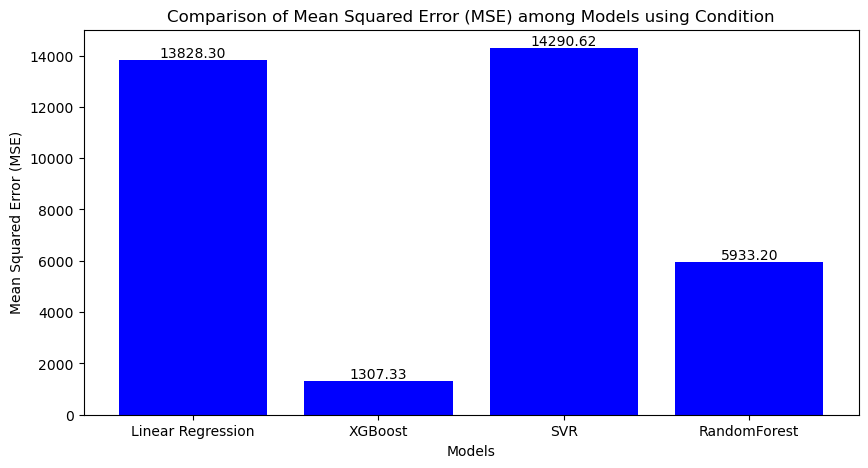

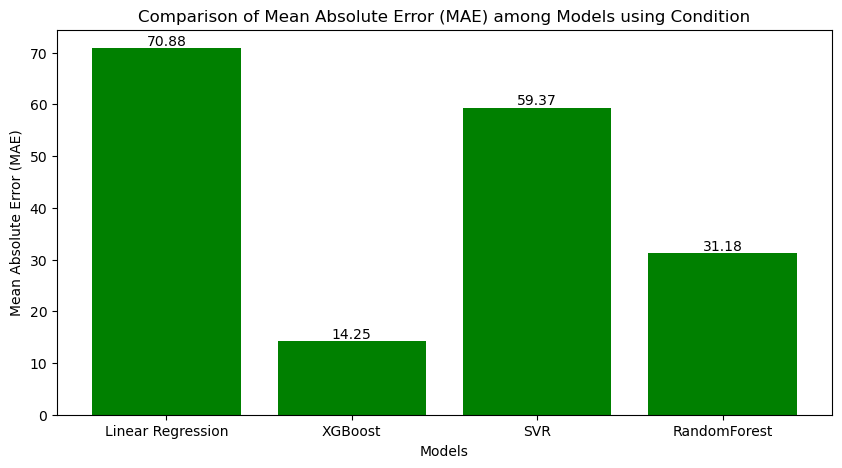

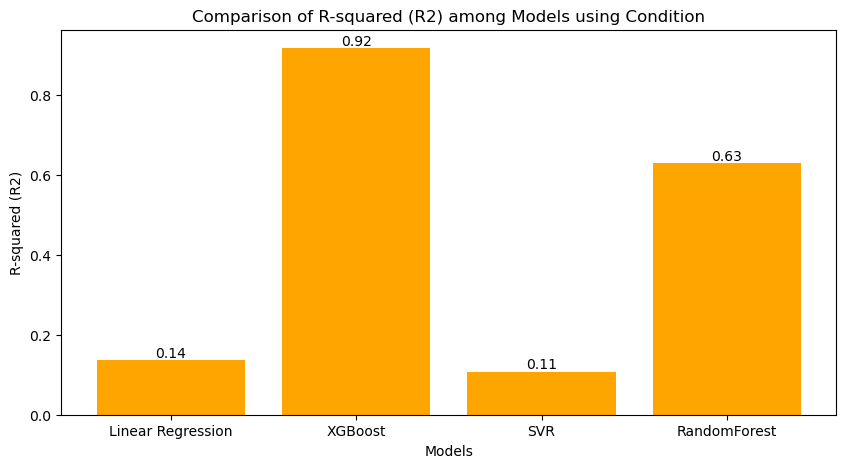

In [10]:
import matplotlib.pyplot as plt

# Create a list of model names and their respective metrics
models = ['Linear Regression', 'XGBoost', 'SVR', 'RandomForest']
mse_scores = [linear_mse, xgboost_mse, svr_mse, rf_mse]
mae_scores = [linear_mae, xgboost_mae, svr_mae,rf_mae]
r2_scores = [linear_r2, xgboost_r2, svr_r2,rf_r2]

# Plot Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models using Condition')

# Add annotations to the bars
for bar, mse in zip(bars, mse_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mse:.2f}', ha='center', va='bottom')

plt.show()


# Plot Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Models using Condition')
# Add annotations to the bars
for bar, mae in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mae:.2f}', ha='center', va='bottom')

plt.show()

# Plot R-squared (R2)
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) among Models using Condition')
# Add annotations to the bars
for bar, r2 in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2:.2f}', ha='center', va='bottom')

plt.show()

